In [26]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 
from matplotlib.legend_handler import HandlerLine2D

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

In [2]:
# load data
train = pd.read_csv("./titanic-train.csv")
test  = pd.read_csv("./titanic-test.csv")

In [3]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

(None, None)

In [4]:
# set "PassengerId" variable as index
# train.set_index("PassengerId", inplace=True)
# test.set_index("PassengerId",  inplace=True)

In [5]:
#Checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=['Train'])
NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


In [6]:
# Filling missing Age values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [7]:
# Filling missing Embarked values with most common value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [8]:
# ‘Pclass’ is a categorical feature so we convert its values to strings
train['Pclass'] = train['Pclass'].apply(str)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [10]:
# drop the name col
train.drop(['Name'], axis=1, inplace=True)

In [13]:
# get all the columns which are of object data type
# these need to be converted to numbers
for col in train.dtypes[train.dtypes == 'object'].index:
    print(col)

Pclass
Sex
Ticket
Cabin
Embarked


In [14]:
# Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == 'object'].index:
   for_dummy = train.pop(col)
   train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [15]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
labels = train.pop('Survived')

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 841), (223, 841), (668,), (223,))

In [27]:
# transform data
# scaler = MinMaxScaler()
# X_train_scale = scaler.fit_transform(X_train)
# X_test_scale  = scaler.transform(X_test)

#### Let’s first fit a gradient boosting classifier with default parameters to get a baseline idea of the performance

In [29]:
model = GradientBoostingClassifier()
model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [30]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#### AUC (Area Under Curve) 

In [31]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8291037175352232

In [32]:
print('Accuracy : ', accuracy_score(y_pred, y_test))

Accuracy :  0.8565022421524664


#### train with Gradient Boosting algorithm

Learning rate:  0.05
Accuracy score (training): 0.853
Accuracy score (test)    : 0.848
Learning rate:  0.1
Accuracy score (training): 0.870
Accuracy score (test)    : 0.848
Learning rate:  0.25
Accuracy score (training): 0.996
Accuracy score (test)    : 0.852
Learning rate:  0.5
Accuracy score (training): 1.000
Accuracy score (test)    : 0.848
Learning rate:  0.75
Accuracy score (training): 0.997
Accuracy score (test)    : 0.865
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (test)    : 0.865


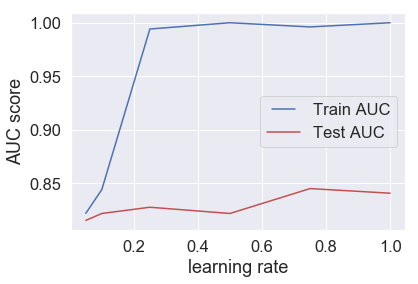

In [33]:
# compute the accuracy scores on train and validation sets when training with different 
# learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

train_results = []
test_results  = []

for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(learning_rate = learning_rate, 
                                    random_state  = 0)
    
    gb.fit(X_train, y_train)
    
    train_pred = gb.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    y_pred = gb.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
    
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test)    : {0:.3f}".format(gb.score(X_test, y_test)))
    
# plot the AUC score vs LR
    
line1, = plt.plot(learning_rates, train_results, 'b', label ="Train AUC")
line2, = plt.plot(learning_rates, test_results,  'r', label ="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()    


> We see that using a high learning rate results in overfitting. For this data, a learning rate of 0.1 is optimal.

#### N_estimators
n_estimators represents the number of trees in the forest. Usually the higher the number of trees the better to learn the data. However, adding a lot of trees can slow down the training process considerably, therefore we do a parameter search to find the sweet spot.

# Estimators             :  1
Accuracy score (training): 0.617
Accuracy score (test)    : 0.614
# Estimators             :  2
Accuracy score (training): 0.618
Accuracy score (test)    : 0.619
# Estimators             :  4
Accuracy score (training): 0.808
Accuracy score (test)    : 0.798
# Estimators             :  8
Accuracy score (training): 0.805
Accuracy score (test)    : 0.794
# Estimators             :  16
Accuracy score (training): 0.826
Accuracy score (test)    : 0.839
# Estimators             :  32
Accuracy score (training): 0.846
Accuracy score (test)    : 0.848
# Estimators             :  64
Accuracy score (training): 0.865
Accuracy score (test)    : 0.848
# Estimators             :  100
Accuracy score (training): 0.870
Accuracy score (test)    : 0.848
# Estimators             :  200
Accuracy score (training): 0.981
Accuracy score (test)    : 0.848


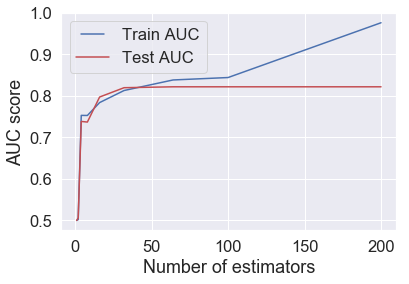

In [34]:
# compute the accuracy scores on train and validation sets when training with different 
# estimators

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

train_results = []
test_results  = []

for estimators in n_estimators:
    gb = GradientBoostingClassifier(n_estimators  = estimators, 
                                    learning_rate = 0.1,
                                    random_state  = 0)

    
    gb.fit(X_train, y_train)
    
    train_pred = gb.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    y_pred = gb.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
    
    print("# Estimators             : ", estimators)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test)    : {0:.3f}".format(gb.score(X_test, y_test)))
    
# plot the AUC score vs LR
    
line1, = plt.plot(n_estimators, train_results, 'b', label ="Train AUC")
line2, = plt.plot(n_estimators, test_results,  'r', label ="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Number of estimators')
plt.show()    


> Increasing the number of estimators may result in overfitting also. In our case, using 32 trees is optimal.

#### max_depth
max_depth. This indicates how deep the built tree can be. The deeper the tree, the more splits it has and it captures more information about how the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test errors.

# Estimators             :  200
Accuracy score (training): 0.787
Accuracy score (test)    : 0.830
# Estimators             :  200
Accuracy score (training): 0.814
Accuracy score (test)    : 0.794
# Estimators             :  200
Accuracy score (training): 0.846
Accuracy score (test)    : 0.848
# Estimators             :  200
Accuracy score (training): 0.871
Accuracy score (test)    : 0.848
# Estimators             :  200
Accuracy score (training): 0.906
Accuracy score (test)    : 0.848
# Estimators             :  200
Accuracy score (training): 0.931
Accuracy score (test)    : 0.861
# Estimators             :  200
Accuracy score (training): 0.949
Accuracy score (test)    : 0.865
# Estimators             :  200
Accuracy score (training): 0.978
Accuracy score (test)    : 0.857
# Estimators             :  200
Accuracy score (training): 1.000
Accuracy score (test)    : 0.861
# Estimators             :  200
Accuracy score (training): 1.000
Accuracy score (test)    : 0.861
# Estimators        

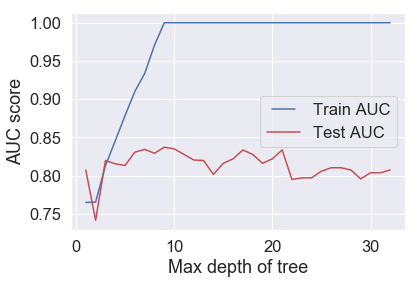

In [35]:
# compute the accuracy scores on train and validation sets when training with different 
# estimators

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results  = []

for max_depth in max_depths:
    gb = GradientBoostingClassifier(n_estimators  = 32, 
                                    learning_rate = 0.1,
                                    max_depth     = max_depth,
                                    random_state  = 0)

    
    gb.fit(X_train, y_train)
    
    train_pred = gb.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(fpr, tpr)
    train_results.append(roc_auc)
    
    y_pred = gb.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    test_results.append(roc_auc)
    
    print("# Estimators             : ", estimators)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test)    : {0:.3f}".format(gb.score(X_test, y_test)))
    
# plot the AUC score vs LR
    
line1, = plt.plot(max_depths, train_results, 'b', label ="Train AUC")
line2, = plt.plot(max_depths, test_results,  'r', label ="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Max depth of tree')
plt.show()    

> We see that our model overfits for large depth values. The tree perfectly predicts all of the train data, however, it fails to generalize the findings for new data

#### Confusion matrix and classification report validation set

In [37]:
gb = GradientBoostingClassifier(n_estimators=32, 
                                learning_rate = 0.1, 
                                max_depth = 10, 
                                random_state = 0)

gb.fit(X_train, y_train)

predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

print("Accuracy")
print(accuracy_score (y_test, predictions))

Confusion Matrix:
[[130   7]
 [ 24  62]]

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       137
           1       0.90      0.72      0.80        86

   micro avg       0.86      0.86      0.86       223
   macro avg       0.87      0.83      0.85       223
weighted avg       0.87      0.86      0.86       223

Accuracy
0.8609865470852018
